# Mumps Preprocessing and Statistics

In this ipyn we will import the data for the three GGD departments and we will preprocess it. At the end of this Notebook there will be a few descriptive statistics about the disease. The notebook is diveded in three parts: Preprocessing, Statistics, and Saving.

## Preprocessing the Data

First we import the nescessary libraries to preprocess the data and then we will use the `pd.read_csv` method to gain acess to it. A few preprocessing steps (deletion of columns) will take place in the next section.

In [125]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [126]:
bzo = pd.read_csv('bzo.csv', sep=';')
hvb = pd.read_csv('hvb.csv', sep=';')
bof = pd.read_csv('bof.csv')

In [127]:
bzo.head(n=1)

,INFECTIEZIEKTE,Melding ontvangen GGD,Geslacht,Geboortejaar,Postcode patient,Eerste ziektedag
0,Bof,20-11-2009,Man,1983,5625,05-11-2009


In [128]:
hvb.head(n=1)

,PATGESLACHT,PATGEBOORTEJAAR,POSTCODECIJFERS,ZIE1EZIEKTEDT,MELGGDONTVDT
0,Man,1977,5374,15-06-2009,29-06-2009


In [129]:
bof.head(n=1)

,Month,search
0,2004-01,0


In [130]:
# We don't need this reduntasnt column. We know that the disease is bof -> mumps.
bzo = bzo.drop('INFECTIEZIEKTE', axis=1)

# We don't need all the rows from Google Trends since our data starts on JAN 2018
bof = bof.drop(bof.index[0:48]).reset_index(drop=True)

In [131]:
# Change the Column Name
bzo.columns = ['Date', 'Sex', 'Year of Birth', 'Postcode', 'Inf_Date']
hvb.columns = ['Sex', 'Year of Birth', 'Postcode', 'Inf_Date', 'Date']
bof.columns = ['Date', 'Search']

In [132]:
bzo['Inf_Date'] = pd.to_datetime(bzo['Inf_Date'], format='%d-%m-%Y')
bzo['Date'] = pd.to_datetime(bzo['Date'], format='%d-%m-%Y')
bzo['Year of Birth'] = pd.to_datetime(bzo['Year of Birth'], format='%Y')

hvb['Inf_Date'] = pd.to_datetime(hvb['Inf_Date'], format='%d-%m-%Y')
hvb['Date'] = pd.to_datetime(hvb['Date'], format='%d-%m-%Y')
hvb['Year of Birth'] = pd.to_datetime(hvb['Year of Birth'], format='%Y')

bof['Date'] = pd.to_datetime(bof['Date'], format='%Y-%m')

In [133]:
# Notification Delay
bzo['Notification_Delay'] = (bzo['Date'] - bzo['Inf_Date']).astype('timedelta64[D]')
hvb['Notification_Delay'] = (hvb['Date'] - hvb['Inf_Date']).astype('timedelta64[D]')

In [134]:
# Age of the Patient
bzo['Patient_Age'] = (bzo['Date'] - bzo['Year of Birth']).astype('timedelta64[Y]')
hvb['Patient_Age'] = (hvb['Date'] - hvb['Year of Birth']).astype('timedelta64[Y]')

In [135]:
bzo.head(n=1)

,Date,Sex,Year of Birth,Postcode,Inf_Date,Notification_Delay,Patient_Age
0,2009-11-20,Man,1983-01-01,5625,2009-11-05,15.0,26.0


In [136]:
hvb.head(n=1)

,Sex,Year of Birth,Postcode,Inf_Date,Date,Notification_Delay,Patient_Age
0,Man,1977-01-01,5374,2009-06-15,2009-06-29,14.0,32.0


Now our three dataframes have the same format.

## Statistics

In this part, we will explore a few statistics about this disease. The statistics include sex and age distribution.

### Sex

In [137]:
# BZO
bzo_man = len(bzo[bzo['Sex'] == 'Man']) / len(bzo) * 100
bzo_vrouw = len(bzo[bzo['Sex'] == 'Vrouw']) / len(bzo) * 100

# HvB
hvb_man = len(hvb[hvb['Sex'] == 'Man']) / len(hvb) * 100
hvb_vrouw = len(hvb[hvb['Sex'] == 'Vrouw']) / len(hvb) * 100

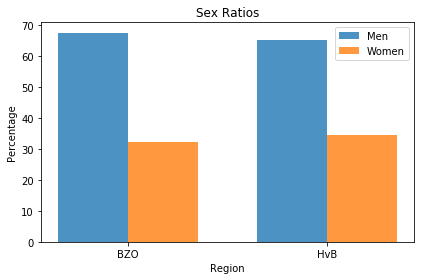

In [138]:
# Plot Barchart

n_groups = 2

perc_men = (bzo_man, hvb_man)
perc_women = (bzo_vrouw , hvb_vrouw)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.8
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, perc_men, bar_width,
                 alpha=opacity,
                 #color='b',
                 label='Men')

rects2 = plt.bar(index + bar_width, perc_women, bar_width,
                 alpha=opacity,
                 #color='r',
                 label='Women')

plt.xlabel('Region')
plt.ylabel('Percentage')
plt.title('Sex Ratios')
plt.xticks(index + bar_width / 2, ('BZO', 'HvB'))
plt.legend()

plt.tight_layout()
plt.show()

### Age distribution

Here we want to explore the age distribution of our patients.

In [139]:
alldf = bzo.append(hvb)

In [140]:
def age_percentage(low_barier, upper_barier):
    '''
    It returns the relative percentage of the Age Distribution, including the
    low barier excluding the upper barier.
    '''
    
    rel_percentage = len(alldf[(alldf['Patient_Age'] > low_barier) & (alldf['Patient_Age'] <= upper_barier)]) / len(alldf)    
    return rel_percentage * 100

In [141]:
age010 = len(alldf[alldf['Patient_Age'] <= 10]) / len(alldf) * 100
age1015 = age_percentage(10, 15)
age1520 = age_percentage(15, 20)
age2025 = age_percentage(20, 25)
age2530 = age_percentage(25, 30)
age3040 = age_percentage(30, 40)
age4050 = age_percentage(40, 50)
age5060 = age_percentage(50, 60)
age6070 = age_percentage(60, 70)
age7080 = age_percentage(70, 80)

In [142]:
ages = [age010, age1015, age1520, age2025, age2530, age3040, age4050, age5060, age6070, age7080]

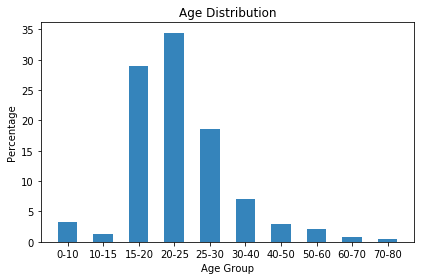

In [143]:
# Plot Barchart

n_groups = 10

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.55

opacity = 0.9
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, ages, bar_width,
                 alpha=opacity,
                 #color='b',
                 label='Age')

plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.title('Age Distribution')
plt.xticks(index + bar_width / 2 - 0.27, ('0-10', '10-15', '15-20', '20-25',
                                          '25-30', '30-40', '40-50', '50-60',
                                         '60-70', '70-80'))

plt.tight_layout()
plt.show()

## Create a New Dataset of Monthly Aggregated Incidences

In [199]:
bzo_count = bzo.set_index('Date').resample('MS').size()
hvb_count = hvb.set_index('Date').resample('MS').size()

In [224]:
count_df = pd.DataFrame({'HVB': hvb_count})
count_df['BZO'] = bzo_count
count_df = count_df.fillna(0)

In [225]:
count_df.head(n=2)

,HVB,BZO
Date,,
2009-06-01,1,0.0
2009-07-01,0,0.0


In [226]:
count_bof = bof.copy()

count_df['Date'] = count_df.index

# Make the date into the %Y-%m format
count_df['Date'] = pd.to_datetime(count_df['Date'])#.dt.to_period('M')
count_bof['Date'] = pd.to_datetime(count_bof['Date'])#.dt.to_period('M')

count_df  = count_df.reset_index(drop=True)

In [227]:
count_df.head(n=1)

,HVB,BZO,Date
0,1,0.0,2009-06-01


In [228]:
count_bof.head(n=1)

,Date,Search
0,2008-01-01,30


In [229]:
counts = pd.merge(count_bof, count_df, how='outer', on='Date')
counts['Date'] = pd.to_datetime(counts['Date'])

# Fill the NaNs
counts = counts.fillna(0)

In [230]:
counts.head(n=1)

,Date,Search,HVB,BZO
0,2008-01-01,30,0.0,0.0


### Plotting the  time series
Now we will plot the time series to explore whether ther was an outbreak.

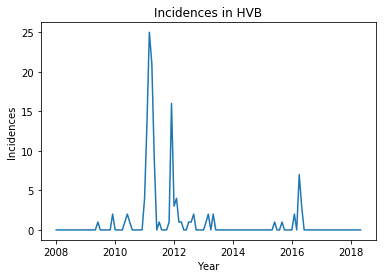

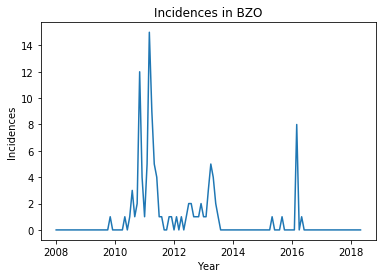

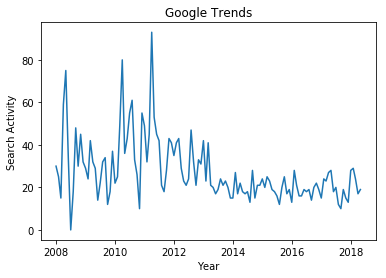

In [238]:
for column in  ['HVB', 'BZO']:
    plt.plot(counts['Date'], counts[column])
    plt.xlabel('Year')
    plt.ylabel('Incidences')
    plt.title('Incidences in '+column)
    plt.show()
    
plt.plot(counts['Date'], counts['Search'])
plt.xlabel('Year')
plt.ylabel('Search Activity')
plt.title('Google Trends')
plt.show()